# IMDB Merge

#### In this notebook, we merge the cmu corpus with the IMDB dataset

### Loading CMU Corpus

In [4]:
CMU_PATH = "MovieSummaries/MovieSummaries"
IMDB_PATH = "MovieSummaries/imdb_data"

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gender_guesser.detector as gender

metadata = pd.read_table(f"{CMU_PATH}/movie.metadata.tsv", header=None)

metadata.columns = [
    "Wikipedia movie ID",
    "Freebase_movie_ID",
    "Movie_name",
    "Movie_release_date",
    "Movie_box_office_revenue",
    "Movie_runtime",
    "Movie_languages", 
    "Movie_countries",  
    "Movie_genres"     
]

metadata


,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


We convert the different columns in a more readable format

In [7]:
import json
metadata["Movie_genres"] = metadata["Movie_genres"].apply(lambda x: list(json.loads(x).values()))
metadata["Movie_languages"] = metadata["Movie_languages"].apply(lambda x: list(json.loads(x).values()))
metadata["Movie_countries"] = metadata["Movie_countries"].apply(lambda x: list(json.loads(x).values()))
metadata

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama]
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,[English Language],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]"
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ..."


## Character metadata

### We also load the character metadata by CMU

In [10]:
characters = pd.read_table(f"{CMU_PATH}/character.metadata.tsv", header=None)

characters.columns = [
"Wikipedia movie ID",
"Freebase movie ID",
"Movie release date",
"Character name",
"Actor date of birth",
"Actor gender",
"Actor height (in meters)",
"Actor ethnicity (Freebase ID)",
"Actor name",
"Actor age at movie release",
"Freebase character/actor map ID",
"Freebase character ID",
"Freebase actor ID"
]

characters

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [11]:
characters =  characters[["Wikipedia movie ID", "Actor gender", "Actor name", "Actor age at movie release"]]

We group the actors such that we get a list that is easier to process

In [13]:
characters = characters.groupby("Wikipedia movie ID").agg({
    "Actor gender": list, 
    "Actor name": list,
    "Actor age at movie release": list,
}).reset_index()
characters

,Wikipedia movie ID,Actor gender,Actor name,Actor age at movie release
0,330,"[F, F, F, F]","[Rosa Maria Sardà, Mercè Pons, Anna Lizaran, N...","[54.0, 29.0, 51.0, 60.0]"
1,3217,"[M, M, M, M, M, F, F, F, M, M, M, nan, M, M]","[Ted Raimi, Ivan Raimi, Bruce Campbell, Bruce ...","[26.0, 36.0, 34.0, 34.0, 26.0, 28.0, 27.0, 35...."
2,3333,"[F, M, F, M, M, F, M, M, M, M, F, F, F, M]","[Lillian Gish, Henry B. Walthall, Mae Marsh, S...","[nan, nan, nan, nan, nan, 11.0, nan, nan, nan,..."
3,3746,"[M, M, M, F, F, F, M, M, M, M, M, M, M, M, nan]","[William Sanderson, Harrison Ford, Rutger Haue...","[34.0, 39.0, 38.0, 22.0, 21.0, 36.0, 37.0, 37...."
4,3837,"[M, M, M, M, M, M, M, M, M, F, M, M, M, M, F, ...","[Jack Starrett, Slim Pickens, Dave Sharpe, Lia...","[37.0, 54.0, 64.0, 57.0, 38.0, 40.0, 43.0, 35...."
...,...,...,...,...
64325,37373877,"[F, F, F, M, M, nan, M]","[Gabrielle Anwar, Traci Lords, Dina Meyer, Geo...","[36.0, 38.0, 37.0, 41.0, 43.0, nan, nan]"
64326,37476824,"[M, F, M, M, M, F, M, F, M, F]","[Zayed Khan, Raveena Tandon, Amitabh Bachchan,...","[30.0, 36.0, 68.0, 37.0, 59.0, 24.0, 40.0, 23...."
64327,37478048,"[M, M, F, M]","[Anupam Kher, Anil Kapoor, Sridevi Kapoor, Akk...","[40.0, 36.0, 32.0, 36.0]"
64328,37492363,"[nan, nan, nan]","[Molly Cera, Taylor Marie Milton, Spencer Jenk...","[nan, nan, nan]"


We check if all actors have a corresponding gender value (could be NaN for now)

In [15]:
characters['len_match'] = characters.apply(lambda row: len(row['Actor name']) == len(row['Actor gender']), axis=1)
mismatch_rows = characters[characters['len_match'] == False]
mismatch_rows

,Wikipedia movie ID,Actor gender,Actor name,Actor age at movie release,len_match


We merge the two datasets to obtain a complete CMU corpus data with both movies and actors

In [17]:
metadata = pd.merge(metadata, characters, on="Wikipedia movie ID", how="inner")
metadata

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Actor gender,Actor name,Actor age at movie release,len_match
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...","[F, F, M, M, F, F, F, M, M, M, M, M, M, M, M, ...","[Wanda De Jesus, Natasha Henstridge, Ice Cube,...","[42.0, 27.0, 32.0, 33.0, 23.0, 52.0, 56.0, nan...",True
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]","[M, F, M, F, M, M, M, F, F, M, M, M, M, M, M]","[Allen Cutler, Alice Barrett, Rod Britt, Hildy...","[nan, 43.0, nan, nan, 50.0, 55.0, 40.0, 35.0, ...",True
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]","[M, F, M, F]","[Frank Krog, Kristin Kajander, Vidar Sandem, A...","[33.0, 28.0, 40.0, 30.0]",True
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...","[M, F]","[David Keith, Cathy Moriarty]","[32.0, 26.0]",True
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],"[F, M, M]","[Gudrun Landgrebe, Mathieu Carrière, Hanns Zis...","[32.0, 32.0, 35.0]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64325,23851782,/m/06_vb43,The Ghost Train,1941-05-03,NaN,82.0,[English Language],[United Kingdom],"[Crime Fiction, Thriller, Comedy, Supernatural]","[F, M, F, M, M, nan, F, M, nan, F, M, M, M]","[Kathleen Harrison, Raymond Huntley, Linden Tr...","[nan, 37.0, 27.0, 34.0, 40.0, nan, 22.0, nan, ...",True
64326,32468537,/m/0crwd9y,Shadow Boxing 2,2007-10-18,NaN,132.0,"[Russian Language, English Language]",[Russia],"[Sports, Crime Fiction, Action, Drama]","[M, F, M, M, M, M, nan, nan, nan, M]","[Andrei Panin, Araceli Guzman-Rico, Giovanni B...","[45.0, nan, nan, 49.0, nan, nan, nan, nan, nan...",True
64327,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]","[M, M]","[Rich Little, Herb Voland]","[33.0, 53.0]",True
64328,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...","[M, M, F, F, M, M, M, M, F, M, M, F, M, F, M]","[Isshin Chiba, Tsutomu Takayama, 笠原弘子, Yumi Tō...","[23.0, 22.0, 22.0, 25.0, 52.0, nan, 32.0, 32.0...",True


### Movie title IMDB data

In [19]:
imdb_titles = pd.read_csv(f"{IMDB_PATH}/title.basics.tsv", sep="\t")

C:\Users\USER\AppData\Local\Temp\ipykernel_18524\2400539453.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_titles = pd.read_csv(f"{IMDB_PATH}/title.basics.tsv", sep="\t")


In [20]:
imdb_titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


### IMDB actor data

In [22]:
imdb_actors = pd.read_csv(f"{IMDB_PATH}/title.principals.tsv", sep="\t", engine = "pyarrow")

In [23]:
imdb_actors

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0005690,producer,producer,\N
3,tt0000001,4,nm0374658,cinematographer,director of photography,\N
4,tt0000002,1,nm0721526,director,\N,\N
...,...,...,...,...,...,...
89094680,tt9916880,17,nm0996406,director,principal director,\N
89094681,tt9916880,18,nm1482639,writer,\N,\N
89094682,tt9916880,19,nm2586970,writer,books,\N
89094683,tt9916880,20,nm1594058,producer,producer,\N


We drop all movie staff that is not an actor or actress

In [25]:
imdb_actors = imdb_actors.drop(
    imdb_actors[~imdb_actors["category"].isin(["actor", "actress"])].index
)

We drop duplicate actors

In [27]:
imdb_actors = imdb_actors.drop_duplicates(subset=['tconst', 'nconst'])

### IMDB Actor names (mapping nconst to a name)

In [29]:
imdb_actors_names = pd.read_csv(f"{IMDB_PATH}/name.basics.tsv", sep="\t", engine = "pyarrow")

In [30]:
imdb_actors_names

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0050419,tt0072308,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0050976,tt0083922"
...,...,...,...,...,...,...
13944213,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt11657662,tt14069590,tt2455546"
13944214,nm9993716,Essias Loberg,\N,\N,\N,\N
13944215,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
13944216,nm9993718,Aayush Nair,\N,\N,cinematographer,tt8736744


We drop all the rows that do not describe movies

In [32]:
imdb_titles = imdb_titles[imdb_titles["titleType"] == 'movie']

In [33]:
imdb_titles.nunique()

tconst            697071
titleType              1
primaryTitle      599769
originalTitle     613424
isAdult                4
startYear            138
endYear                1
runtimeMinutes       519
genres              1491
dtype: int64

We can see that endYear is not really useful (only 1 value). We decide to drop it and only use startYear as reference for later.

In [35]:
imdb_titles = imdb_titles.drop(columns=["endYear"])

In [36]:
imdb_titles["startYear"] = pd.to_numeric(imdb_titles["startYear"], errors="coerce")
imdb_titles["startYear"] = imdb_titles["startYear"].fillna(0).astype(int)
imdb_titles = imdb_titles.rename(columns = {"startYear":"Movie_release_date"})

We repeat the operation for the actors dataset

In [38]:
imdb_actors = imdb_actors[imdb_actors['tconst'].isin(imdb_titles['tconst'])]

We merge the names

In [40]:
imdb_actors = imdb_actors.merge(imdb_actors_names[['nconst', 'primaryName']], on='nconst', how='left')

In [41]:
imdb_actors.category = imdb_actors.category.map({"actor": "M", "actress": "F"})

In [42]:
imdb_actors = imdb_actors.rename(columns={"category":"gender"})

In [43]:
imdb_actors

,tconst,ordering,nconst,gender,job,characters,primaryName
0,tt0000009,1,nm0063086,F,\N,"[""Miss Geraldine Holbrook (Miss Jerry)""]",Blanche Bayliss
1,tt0000009,2,nm0183823,M,\N,"[""Mr. Hamilton""]",William Courtenay
2,tt0000009,3,nm1309758,M,\N,"[""Chauncey Depew - the Director of the New Yor...",Chauncey Depew
3,tt0000502,1,nm0215752,M,\N,\N,Antonio del Pozo
4,tt0000502,2,nm0252720,M,\N,\N,El Mochuelo
...,...,...,...,...,...,...,...
3796254,tt9916730,4,nm4852679,M,\N,\N,Bhushan Pradhan
3796255,tt9916730,5,nm9050497,M,\N,\N,Pranav Raorane
3796256,tt9916730,6,nm7365126,F,\N,\N,Aarti Solanki
3796257,tt9916730,7,nm1576284,F,\N,\N,Amruta Subhash


In [44]:
imdb_actors_clean = imdb_actors.drop(columns = ["ordering", "job", "characters"])
imdb_actors_clean

,tconst,nconst,gender,primaryName
0,tt0000009,nm0063086,F,Blanche Bayliss
1,tt0000009,nm0183823,M,William Courtenay
2,tt0000009,nm1309758,M,Chauncey Depew
3,tt0000502,nm0215752,M,Antonio del Pozo
4,tt0000502,nm0252720,M,El Mochuelo
...,...,...,...,...
3796254,tt9916730,nm4852679,M,Bhushan Pradhan
3796255,tt9916730,nm9050497,M,Pranav Raorane
3796256,tt9916730,nm7365126,F,Aarti Solanki
3796257,tt9916730,nm1576284,F,Amruta Subhash


In [45]:
aggregate_actors = imdb_actors_clean.groupby("tconst").agg({
    "gender": list, 
    "primaryName": list,
}).reset_index()
aggregate_actors

,tconst,gender,primaryName
0,tt0000009,"[F, M, M]","[Blanche Bayliss, William Courtenay, Chauncey ..."
1,tt0000502,"[M, M]","[Antonio del Pozo, El Mochuelo]"
2,tt0000574,"[F, M, M, M, M, F, M, M, M, M]","[Elizabeth Tait, John Tait, Nicholas Brierley,..."
3,tt0000591,"[M, M, F, F]","[Georges Wague, Henri Gouget, Christiane Mande..."
4,tt0000615,"[M, M, M, M, M, F]","[Jim Gerald, George Merriman, Lance Vane, Will..."
...,...,...,...
506218,tt9916428,"[M, M, M, M, F, M, M, M, M, M]","[Kenan Heppe, Wang Peng Kai, Valery Gadreau, X..."
506219,tt9916538,"[F, F, M, F, M, M, M, M, F, M]","[Lala Karmela, Cut Mini Theo, Sahil Shah, Ria ..."
506220,tt9916622,[M],[Oldair Soares Ammom]
506221,tt9916706,"[M, M, M, F, F, M, M, M, F, M]","[Makarand Anaspure, Anvay Bendre, Prakash Dhot..."


We merge the two imdb datasets on the tconst (imdb unique id)

In [47]:
imdb_titles = imdb_titles.merge(aggregate_actors, on = "tconst", how = "left")

In [48]:
imdb_titles = imdb_titles.rename(columns={"primaryName":"actors"})

We double check if all actors have their corresponding gender (could be NaN for now)

In [50]:
imdb_titles['gender'].apply(type).value_counts()

gender
<class 'list'>     506223
<class 'float'>    190848
Name: count, dtype: int64

In [51]:
imdb_titles['actors'] = imdb_titles['actors'].apply(lambda x: [] if isinstance(x, float) and pd.isna(x) else x)
imdb_titles['gender'] = imdb_titles['gender'].apply(lambda x: [] if isinstance(x, float) and pd.isna(x) else x)

In [52]:
imdb_titles['len_match_imdb'] = imdb_titles.apply(
    lambda row: len(row['actors']) == len(row['gender']), axis=1
)
mismatch_rows  = imdb_titles[imdb_titles['len_match_imdb'] == False]
mismatch_rows

,tconst,titleType,primaryTitle,originalTitle,isAdult,Movie_release_date,runtimeMinutes,genres,gender,actors,len_match_imdb


Here we handle the release date

In [54]:
metadata['Movie_release_date'] = pd.to_numeric(metadata['Movie_release_date'].str[:4], errors='coerce')
metadata['Movie_release_date'] = metadata['Movie_release_date'].fillna(0).astype(int)
metadata.loc[metadata['Movie_release_date']==1010,'Movie_release_date'] = 2010
metadata

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Actor gender,Actor name,Actor age at movie release,len_match
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...","[F, F, M, M, F, F, F, M, M, M, M, M, M, M, M, ...","[Wanda De Jesus, Natasha Henstridge, Ice Cube,...","[42.0, 27.0, 32.0, 33.0, 23.0, 52.0, 56.0, nan...",True
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]","[M, F, M, F, M, M, M, F, F, M, M, M, M, M, M]","[Allen Cutler, Alice Barrett, Rod Britt, Hildy...","[nan, 43.0, nan, nan, 50.0, 55.0, 40.0, 35.0, ...",True
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]","[M, F, M, F]","[Frank Krog, Kristin Kajander, Vidar Sandem, A...","[33.0, 28.0, 40.0, 30.0]",True
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...","[M, F]","[David Keith, Cathy Moriarty]","[32.0, 26.0]",True
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],"[F, M, M]","[Gudrun Landgrebe, Mathieu Carrière, Hanns Zis...","[32.0, 32.0, 35.0]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64325,23851782,/m/06_vb43,The Ghost Train,1941,NaN,82.0,[English Language],[United Kingdom],"[Crime Fiction, Thriller, Comedy, Supernatural]","[F, M, F, M, M, nan, F, M, nan, F, M, M, M]","[Kathleen Harrison, Raymond Huntley, Linden Tr...","[nan, 37.0, 27.0, 34.0, 40.0, nan, 22.0, nan, ...",True
64326,32468537,/m/0crwd9y,Shadow Boxing 2,2007,NaN,132.0,"[Russian Language, English Language]",[Russia],"[Sports, Crime Fiction, Action, Drama]","[M, F, M, M, M, M, nan, nan, nan, M]","[Andrei Panin, Araceli Guzman-Rico, Giovanni B...","[45.0, nan, nan, 49.0, nan, nan, nan, nan, nan...",True
64327,9971909,/m/02pygw1,Another Nice Mess,1972,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]","[M, M]","[Rich Little, Herb Voland]","[33.0, 53.0]",True
64328,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992,NaN,150.0,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...","[M, M, F, F, M, M, M, M, F, M, M, F, M, F, M]","[Isshin Chiba, Tsutomu Takayama, 笠原弘子, Yumi Tō...","[23.0, 22.0, 22.0, 25.0, 52.0, nan, 32.0, 32.0...",True


In [55]:
metadata

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Actor gender,Actor name,Actor age at movie release,len_match
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...","[F, F, M, M, F, F, F, M, M, M, M, M, M, M, M, ...","[Wanda De Jesus, Natasha Henstridge, Ice Cube,...","[42.0, 27.0, 32.0, 33.0, 23.0, 52.0, 56.0, nan...",True
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]","[M, F, M, F, M, M, M, F, F, M, M, M, M, M, M]","[Allen Cutler, Alice Barrett, Rod Britt, Hildy...","[nan, 43.0, nan, nan, 50.0, 55.0, 40.0, 35.0, ...",True
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]","[M, F, M, F]","[Frank Krog, Kristin Kajander, Vidar Sandem, A...","[33.0, 28.0, 40.0, 30.0]",True
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...","[M, F]","[David Keith, Cathy Moriarty]","[32.0, 26.0]",True
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],"[F, M, M]","[Gudrun Landgrebe, Mathieu Carrière, Hanns Zis...","[32.0, 32.0, 35.0]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64325,23851782,/m/06_vb43,The Ghost Train,1941,NaN,82.0,[English Language],[United Kingdom],"[Crime Fiction, Thriller, Comedy, Supernatural]","[F, M, F, M, M, nan, F, M, nan, F, M, M, M]","[Kathleen Harrison, Raymond Huntley, Linden Tr...","[nan, 37.0, 27.0, 34.0, 40.0, nan, 22.0, nan, ...",True
64326,32468537,/m/0crwd9y,Shadow Boxing 2,2007,NaN,132.0,"[Russian Language, English Language]",[Russia],"[Sports, Crime Fiction, Action, Drama]","[M, F, M, M, M, M, nan, nan, nan, M]","[Andrei Panin, Araceli Guzman-Rico, Giovanni B...","[45.0, nan, nan, 49.0, nan, nan, nan, nan, nan...",True
64327,9971909,/m/02pygw1,Another Nice Mess,1972,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]","[M, M]","[Rich Little, Herb Voland]","[33.0, 53.0]",True
64328,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992,NaN,150.0,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...","[M, M, F, F, M, M, M, M, F, M, M, F, M, F, M]","[Isshin Chiba, Tsutomu Takayama, 笠原弘子, Yumi Tō...","[23.0, 22.0, 22.0, 25.0, 52.0, nan, 32.0, 32.0...",True


In [56]:
imdb_titles = imdb_titles.rename(columns={"runtimeMinutes": "Movie_runtime"})
imdb_titles["Movie_runtime"] = imdb_titles["Movie_runtime"].replace("\\N", np.nan).astype(float)

## Merging the two datasets

In [62]:
metadata.head(1)

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Actor gender,Actor name,Actor age at movie release,len_match
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...","[F, F, M, M, F, F, F, M, M, M, M, M, M, M, M, ...","[Wanda De Jesus, Natasha Henstridge, Ice Cube,...","[42.0, 27.0, 32.0, 33.0, 23.0, 52.0, 56.0, nan...",True


In [63]:
metadata.drop(['Actor gender', 'Actor name', 'Actor age at movie release', 'len_match'], axis=1, inplace=True)

In [64]:
imdb_titles.head(1)

,tconst,titleType,primaryTitle,originalTitle,isAdult,Movie_release_date,Movie_runtime,genres,gender,actors,len_match_imdb
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45.0,Romance,"[F, M, M]","[Blanche Bayliss, William Courtenay, Chauncey ...",True


In [65]:
imdb_titles.drop(['titleType', 'primaryTitle', 'originalTitle', 'len_match_imdb', 'Movie_runtime'], axis=1, inplace=True)

In this code, we read the wikidata to have a mapping between IMDB ID and Freebase ID. This will be useful for us to merge the two datasets. 

In [67]:
!pip install SPARQLWrapper -q

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [127]:
from SPARQLWrapper import SPARQLWrapper, JSON

# Initialize the SPARQLWrapper
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

# Set the SPARQL query to get IMDb ID and Freebase Movie ID 
sparql.setQuery("""
    SELECT ?imdbID ?freebaseID WHERE {
      ?movie wdt:P31 wd:Q11424.                # The movie is a film
      ?movie wdt:P345 ?imdbID.                 # The movie has an IMDb ID
      ?movie wdt:P646 ?freebaseID.             # The movie has a Freebase ID
    }
""")

# Set the return format as JSON
sparql.setReturnFormat(JSON)

# Execute the query and get the results
results = sparql.query().convert()

# Create a list to store the results
data = []

# Iterate over the results and store each IMDb ID and Freebase Movie ID
for result in results["results"]["bindings"]:
    imdb_id = result["imdbID"]["value"]
    freebase_id = result["freebaseID"]["value"]
    data.append([imdb_id, freebase_id])

# Convert the list of results into a pandas DataFrame
tconst_freebase_df = pd.DataFrame(data, columns=["tconst", "Freebase_movie_ID"])

# Display the DataFrame
tconst_freebase_df

,tconst,Freebase_movie_ID
0,tt0069057,/m/04j034c
1,tt0084228,/m/02rwlh8
2,tt0055241,/m/0nd2tqh
3,tt0055012,/m/0nd33rk
4,tt0150369,/m/0nd4tf2
...,...,...
106107,tt0283989,/m/0crrv_x
106108,tt1176733,/m/0cs5560
106109,tt4241338,/m/0129bw1s
106110,tt1772941,/m/012bnmkd


In [69]:
metadata.head(1)

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."


In [70]:
imdb_titles.head(1)

,tconst,isAdult,Movie_release_date,genres,gender,actors
0,tt0000009,0,1894,Romance,"[F, M, M]","[Blanche Bayliss, William Courtenay, Chauncey ..."


In [71]:
metadata

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]
...,...,...,...,...,...,...,...,...,...
64325,23851782,/m/06_vb43,The Ghost Train,1941,NaN,82.0,[English Language],[United Kingdom],"[Crime Fiction, Thriller, Comedy, Supernatural]"
64326,32468537,/m/0crwd9y,Shadow Boxing 2,2007,NaN,132.0,"[Russian Language, English Language]",[Russia],"[Sports, Crime Fiction, Action, Drama]"
64327,9971909,/m/02pygw1,Another Nice Mess,1972,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]"
64328,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992,NaN,150.0,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ..."


We first add the tconsts (IMDB ids) to our metadata

In [130]:
first_merge_df = pd.merge(metadata, tconst_freebase_df, on=["Freebase_movie_ID"], how='inner')
first_merge_df

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,tconst
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",tt0228333
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",tt0094806
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",tt0094320
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],tt0083949
4,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]",tt0029852
...,...,...,...,...,...,...,...,...,...,...
52217,26482675,/m/0bbwngb,Eşrefpaşalılar,2010,1847671.0,NaN,[],[],"[Comedy film, Drama]",tt1601823
52218,23851782,/m/06_vb43,The Ghost Train,1941,NaN,82.0,[English Language],[United Kingdom],"[Crime Fiction, Thriller, Comedy, Supernatural]",tt0033660
52219,32468537,/m/0crwd9y,Shadow Boxing 2,2007,NaN,132.0,"[Russian Language, English Language]",[Russia],"[Sports, Crime Fiction, Action, Drama]",tt0459759
52220,9971909,/m/02pygw1,Another Nice Mess,1972,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]",tt0362411


We then proceed to merge the IMDB dataset with our metadata using the tconst variable

In [73]:
second_merge_df = pd.merge(first_merge_df, imdb_titles, on=["tconst"], how='inner')
second_merge_df

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date_x,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,tconst,isAdult,Movie_release_date_y,genres,gender,actors
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",tt0228333,0,2001,"Action,Horror,Sci-Fi","[F, M, F, M, F, F, M, F, M, M]","[Natasha Henstridge, Ice Cube, Pam Grier, Jaso..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",tt0094806,0,1988,"Crime,Drama","[M, F, F, M, M, M, F, M, M, F]","[Frank Krog, Kristin Kajander, Anne Krigsvoll,..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",tt0094320,0,1987,"Horror,Mystery,Thriller","[M, F, M, M, M, F, F, M, M, M]","[David Keith, Cathy Moriarty, Alan Rosenberg, ..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],tt0083949,0,1983,Drama,"[F, M, M, F, M, M, F, M, M, F]","[Gudrun Landgrebe, Mathieu Carrière, Hanns Zis..."
4,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]",tt0029852,0,1938,"Drama,Music,Musical","[M, F, M, F, M, M, F, M, M, M]","[Tyrone Power, Alice Faye, Don Ameche, Ethel M..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49575,26482675,/m/0bbwngb,Eşrefpaşalılar,2010,1847671.0,NaN,[],[],"[Comedy film, Drama]",tt1601823,0,2010,"Comedy,Drama","[M, M, M, M, F, F, M, M, M, M]","[Sinan Albayrak, Burak Tarik, Turgay Tanülkü, ..."
49576,23851782,/m/06_vb43,The Ghost Train,1941,NaN,82.0,[English Language],[United Kingdom],"[Crime Fiction, Thriller, Comedy, Supernatural]",tt0033660,0,1941,"Comedy,Horror","[M, M, F, M, F, M, F, M, M, M]","[Arthur Askey, Richard Murdoch, Kathleen Harri..."
49577,32468537,/m/0crwd9y,Shadow Boxing 2,2007,NaN,132.0,"[Russian Language, English Language]",[Russia],"[Sports, Crime Fiction, Action, Drama]",tt0459759,0,2007,"Action,Crime,Drama","[F, M, M, M, M, F, M, M, M, M]","[Elena Panova, Andrey Panin, Victor Herminio L..."
49578,9971909,/m/02pygw1,Another Nice Mess,1972,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]",tt0362411,0,1972,Comedy,"[M, M, F, M, M, M, F, M, M, M]","[Rich Little, Herb Voland, Diahn Williams, Bru..."


In [74]:
second_merge_df.isna().sum()

Wikipedia movie ID              0
Freebase_movie_ID               0
Movie_name                      0
Movie_release_date_x            0
Movie_box_office_revenue    41673
Movie_runtime                8405
Movie_languages                 0
Movie_countries                 0
Movie_genres                    0
tconst                          0
isAdult                         0
Movie_release_date_y            0
genres                          0
gender                          0
actors                          0
dtype: int64

In [162]:
def assign_role_importance(merged_df):
    """
    Function to assign first, second, and third roles for actors and genders.
    
    Parameters:
    - merged_df: DataFrame containing the columns 'actors' and 'gender' (lists).
    
    Returns:
    - A DataFrame with columns 'first_role', 'second_role', 'third_role' for actors and genders.
    """
    merged_df['first_role_actor'] = None
    merged_df['second_role_actor'] = None
    merged_df['third_role_actor'] = None
    merged_df['first_role_gender'] = None
    merged_df['second_role_gender'] = None
    merged_df['third_role_gender'] = None
    
    for index, row in merged_df.iterrows():
        actors = row['actors']
        genders = row['gender']
        
        if len(actors) > 0:
            merged_df.at[index, 'first_role_actor'] = actors[0]
            merged_df.at[index, 'first_role_gender'] = genders[0] if len(genders) > 0 else None
        if len(actors) > 1:
            merged_df.at[index, 'second_role_actor'] = actors[1]
            merged_df.at[index, 'second_role_gender'] = genders[1] if len(genders) > 1 else None
        if len(actors) > 2:
            merged_df.at[index, 'third_role_actor'] = actors[2]
            merged_df.at[index, 'third_role_gender'] = genders[2] if len(genders) > 2 else None
    
    return merged_df

In [164]:
merged_df = assign_role_importance(second_merge_df)
copy_merged_df = merged_df
merged_df

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date_x,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,tconst,...,gender,actors,first_role_actor,second_role_actor,third_role_actor,first_role_gender,second_role_gender,third_role_gender,F,M
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",tt0228333,...,"[F, M, F, M, F, F, M, F, M, M]","[Natasha Henstridge, Ice Cube, Pam Grier, Jaso...",Natasha Henstridge,Ice Cube,Pam Grier,F,M,F,2,1
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",tt0094806,...,"[M, F, F, M, M, M, F, M, M, F]","[Frank Krog, Kristin Kajander, Anne Krigsvoll,...",Frank Krog,Kristin Kajander,Anne Krigsvoll,M,F,F,2,1
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",tt0094320,...,"[M, F, M, M, M, F, F, M, M, M]","[David Keith, Cathy Moriarty, Alan Rosenberg, ...",David Keith,Cathy Moriarty,Alan Rosenberg,M,F,M,1,2
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],tt0083949,...,"[F, M, M, F, M, M, F, M, M, F]","[Gudrun Landgrebe, Mathieu Carrière, Hanns Zis...",Gudrun Landgrebe,Mathieu Carrière,Hanns Zischler,F,M,M,1,2
4,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]",tt0029852,...,"[M, F, M, F, M, M, F, M, M, M]","[Tyrone Power, Alice Faye, Don Ameche, Ethel M...",Tyrone Power,Alice Faye,Don Ameche,M,F,M,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49575,26482675,/m/0bbwngb,Eşrefpaşalılar,2010,1847671.0,NaN,[],[],"[Comedy film, Drama]",tt1601823,...,"[M, M, M, M, F, F, M, M, M, M]","[Sinan Albayrak, Burak Tarik, Turgay Tanülkü, ...",Sinan Albayrak,Burak Tarik,Turgay Tanülkü,M,M,M,0,3
49576,23851782,/m/06_vb43,The Ghost Train,1941,NaN,82.0,[English Language],[United Kingdom],"[Crime Fiction, Thriller, Comedy, Supernatural]",tt0033660,...,"[M, M, F, M, F, M, F, M, M, M]","[Arthur Askey, Richard Murdoch, Kathleen Harri...",Arthur Askey,Richard Murdoch,Kathleen Harrison,M,M,F,1,2
49577,32468537,/m/0crwd9y,Shadow Boxing 2,2007,NaN,132.0,"[Russian Language, English Language]",[Russia],"[Sports, Crime Fiction, Action, Drama]",tt0459759,...,"[F, M, M, M, M, F, M, M, M, M]","[Elena Panova, Andrey Panin, Victor Herminio L...",Elena Panova,Andrey Panin,Victor Herminio Lopez,F,M,M,1,2
49578,9971909,/m/02pygw1,Another Nice Mess,1972,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]",tt0362411,...,"[M, M, F, M, M, M, F, M, M, M]","[Rich Little, Herb Voland, Diahn Williams, Bru...",Rich Little,Herb Voland,Diahn Williams,M,M,F,1,2


In [165]:
merged_df['F'] = (merged_df[['first_role_gender', 'second_role_gender', 'third_role_gender']] == 'F').sum(axis=1)
merged_df['M'] = (merged_df[['first_role_gender', 'second_role_gender', 'third_role_gender']] == 'M').sum(axis=1)
merged_df

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date_x,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,tconst,...,gender,actors,first_role_actor,second_role_actor,third_role_actor,first_role_gender,second_role_gender,third_role_gender,F,M
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",tt0228333,...,"[F, M, F, M, F, F, M, F, M, M]","[Natasha Henstridge, Ice Cube, Pam Grier, Jaso...",Natasha Henstridge,Ice Cube,Pam Grier,F,M,F,2,1
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",tt0094806,...,"[M, F, F, M, M, M, F, M, M, F]","[Frank Krog, Kristin Kajander, Anne Krigsvoll,...",Frank Krog,Kristin Kajander,Anne Krigsvoll,M,F,F,2,1
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",tt0094320,...,"[M, F, M, M, M, F, F, M, M, M]","[David Keith, Cathy Moriarty, Alan Rosenberg, ...",David Keith,Cathy Moriarty,Alan Rosenberg,M,F,M,1,2
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],tt0083949,...,"[F, M, M, F, M, M, F, M, M, F]","[Gudrun Landgrebe, Mathieu Carrière, Hanns Zis...",Gudrun Landgrebe,Mathieu Carrière,Hanns Zischler,F,M,M,1,2
4,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]",tt0029852,...,"[M, F, M, F, M, M, F, M, M, M]","[Tyrone Power, Alice Faye, Don Ameche, Ethel M...",Tyrone Power,Alice Faye,Don Ameche,M,F,M,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49575,26482675,/m/0bbwngb,Eşrefpaşalılar,2010,1847671.0,NaN,[],[],"[Comedy film, Drama]",tt1601823,...,"[M, M, M, M, F, F, M, M, M, M]","[Sinan Albayrak, Burak Tarik, Turgay Tanülkü, ...",Sinan Albayrak,Burak Tarik,Turgay Tanülkü,M,M,M,0,3
49576,23851782,/m/06_vb43,The Ghost Train,1941,NaN,82.0,[English Language],[United Kingdom],"[Crime Fiction, Thriller, Comedy, Supernatural]",tt0033660,...,"[M, M, F, M, F, M, F, M, M, M]","[Arthur Askey, Richard Murdoch, Kathleen Harri...",Arthur Askey,Richard Murdoch,Kathleen Harrison,M,M,F,1,2
49577,32468537,/m/0crwd9y,Shadow Boxing 2,2007,NaN,132.0,"[Russian Language, English Language]",[Russia],"[Sports, Crime Fiction, Action, Drama]",tt0459759,...,"[F, M, M, M, M, F, M, M, M, M]","[Elena Panova, Andrey Panin, Victor Herminio L...",Elena Panova,Andrey Panin,Victor Herminio Lopez,F,M,M,1,2
49578,9971909,/m/02pygw1,Another Nice Mess,1972,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]",tt0362411,...,"[M, M, F, M, M, M, F, M, M, M]","[Rich Little, Herb Voland, Diahn Williams, Bru...",Rich Little,Herb Voland,Diahn Williams,M,M,F,1,2


<h3>Now we check ratio evolution throughout years</h3>

In [167]:
gender_year_df = merged_df[merged_df["Movie_release_date_x"] > 0]
gender_year_df["Movie_release_date_x"].describe()

count    47386.000000
mean      1979.253640
std         26.675103
min       1897.000000
25%       1959.000000
50%       1986.000000
75%       2003.000000
max       2015.000000
Name: Movie_release_date_x, dtype: float64

In [168]:
gender_year_df = gender_year_df[["Movie_release_date_x", "F", "M"]]

In [169]:
gender_year_df.loc[:,"sum"] = gender_year_df["F"] + gender_year_df["M"]

In [170]:
gender_year_df.isna().sum()

Movie_release_date_x    0
F                       0
M                       0
sum                     0
dtype: int64

In [171]:
gender_year_sum_df = gender_year_df.groupby("Movie_release_date_x").agg({
    "F": sum, 
    "M": sum,
    "sum": sum,
}).reset_index()
gender_year_sum_df

C:\Users\USER\AppData\Local\Temp\ipykernel_18524\2630017406.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  gender_year_sum_df = gender_year_df.groupby("Movie_release_date_x").agg({


,Movie_release_date_x,F,M,sum
0,1897,0,0,0
1,1907,1,5,6
2,1908,0,3,3
3,1910,4,8,12
4,1911,7,23,30
...,...,...,...,...
104,2011,1331,2197,3528
105,2012,864,1515,2379
106,2013,99,221,320
107,2014,11,10,21


In [172]:
gender_year_sum_df = gender_year_sum_df[gender_year_sum_df["sum"] > 0]
gender_year_sum_df

,Movie_release_date_x,F,M,sum
1,1907,1,5,6
2,1908,0,3,3
3,1910,4,8,12
4,1911,7,23,30
5,1912,13,15,28
...,...,...,...,...
104,2011,1331,2197,3528
105,2012,864,1515,2379
106,2013,99,221,320
107,2014,11,10,21


In [173]:
gender_year_sum_df.loc[:, "Female_ratio"] = gender_year_sum_df["F"]/gender_year_sum_df["sum"]
gender_year_sum_df = gender_year_sum_df[["Movie_release_date_x", "Female_ratio"]]

C:\Users\USER\AppData\Local\Temp\ipykernel_18524\3191203670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_year_sum_df.loc[:, "Female_ratio"] = gender_year_sum_df["F"]/gender_year_sum_df["sum"]


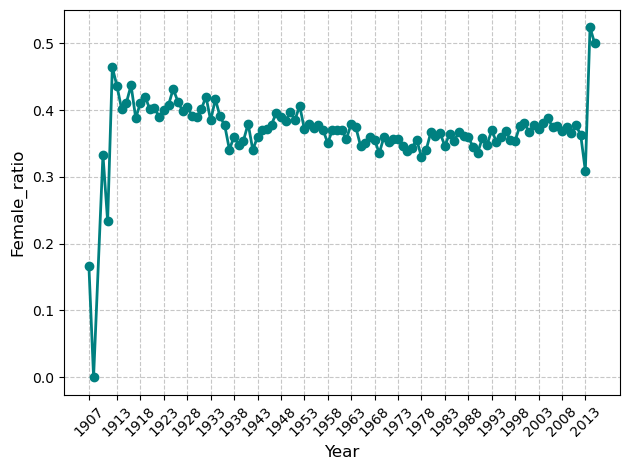

In [174]:
plt.plot(gender_year_sum_df['Movie_release_date_x'], gender_year_sum_df['Female_ratio'], color='teal', marker='o', linestyle='-', linewidth=2)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Female_ratio', fontsize=12)
plt.xticks(gender_year_sum_df['Movie_release_date_x'][::5], rotation=45)  # Show every 5th year
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<h3>Analysis with some countries</h3>

In [224]:
def country_female_ratio(merged_df, country):
    merged_df = merged_df[merged_df["Movie_countries"].apply(lambda x: country in x and len(x) == 1)]
    
    merged_df.loc[:, 'F'] = (merged_df[['first_role_gender', 'second_role_gender', 'third_role_gender']] == 'F').sum(axis=1)
    merged_df.loc[:, 'M'] = (merged_df[['first_role_gender', 'second_role_gender', 'third_role_gender']] == 'M').sum(axis=1)
    gender_year_df = merged_df[merged_df["Movie_release_date_x"] > 0]
    gender_year_df = gender_year_df[["Movie_release_date_x", "F", "M"]]
    gender_year_df.loc[:,"sum"] = gender_year_df["F"] + gender_year_df["M"]
    gender_year_sum_df = gender_year_df.groupby("Movie_release_date_x").agg({
    "F": "sum", 
    "M": "sum",
    "sum": "sum",
    }).reset_index()
    gender_year_sum_df = gender_year_sum_df[gender_year_sum_df["sum"] > 0]
    gender_year_sum_df.loc[:, "Female_ratio"] = gender_year_sum_df["F"]/gender_year_sum_df["sum"]
    gender_year_sum_df = gender_year_sum_df[["Movie_release_date_x", "Female_ratio"]]

    plt.plot(gender_year_sum_df['Movie_release_date_x'], gender_year_sum_df['Female_ratio'], color='teal', marker='o', linestyle='-', linewidth=2)
    
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Female_ratio', fontsize=12)
    plt.xticks(gender_year_sum_df['Movie_release_date_x'][::5], rotation=45)  # Show every 5th year
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # plt.show()

In [177]:
merged_df.head(1)

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date_x,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,tconst,...,gender,actors,first_role_actor,second_role_actor,third_role_actor,first_role_gender,second_role_gender,third_role_gender,F,M
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",tt0228333,...,"[F, M, F, M, F, F, M, F, M, M]","[Natasha Henstridge, Ice Cube, Pam Grier, Jaso...",Natasha Henstridge,Ice Cube,Pam Grier,F,M,F,2,1


In [178]:
all_countries = set(country for sublist in merged_df["Movie_countries"] for country in sublist)
country_dict = {}
for country in all_countries:
    country_dict[country] = metadata[metadata["Movie_countries"].apply(lambda x: country in x and len(x) == 1)].shape[0]
# country_dict
sorted_by_values = dict(sorted(country_dict.items(), key=lambda item: item[1], reverse=True))
sorted_by_values

{'United States of America': 26277,
 'India': 7421,
 'United Kingdom': 3834,
 'Japan': 1654,
 'France': 1368,
 'Italy': 1173,
 'Canada': 994,
 'Hong Kong': 780,
 'South Korea': 680,
 'Germany': 508,
 'Australia': 455,
 'Spain': 393,
 'Mexico': 372,
 'Argentina': 343,
 'Denmark': 333,
 'Sweden': 313,
 'Philippines': 304,
 'Soviet Union': 283,
 'Netherlands': 250,
 'China': 213,
 'Norway': 189,
 'Hungary': 168,
 'Poland': 154,
 'Brazil': 150,
 'Pakistan': 137,
 'Thailand': 132,
 'Turkey': 129,
 'Finland': 116,
 'Greece': 115,
 'Russia': 113,
 'West Germany': 111,
 'Yugoslavia': 99,
 'Egypt': 95,
 'Iran': 92,
 'Czechoslovakia': 76,
 'Czech Republic': 75,
 'Israel': 71,
 'Austria': 71,
 'Malaysia': 67,
 'Indonesia': 65,
 'New Zealand': 65,
 'South Africa': 64,
 'Sri Lanka': 59,
 'Croatia': 58,
 'Bangladesh': 48,
 'Ireland': 46,
 'Romania': 45,
 'Portugal': 44,
 'Singapore': 44,
 'Bulgaria': 42,
 'Belgium': 42,
 'Taiwan': 38,
 'Cambodia': 38,
 'German Democratic Republic': 34,
 'England': 2

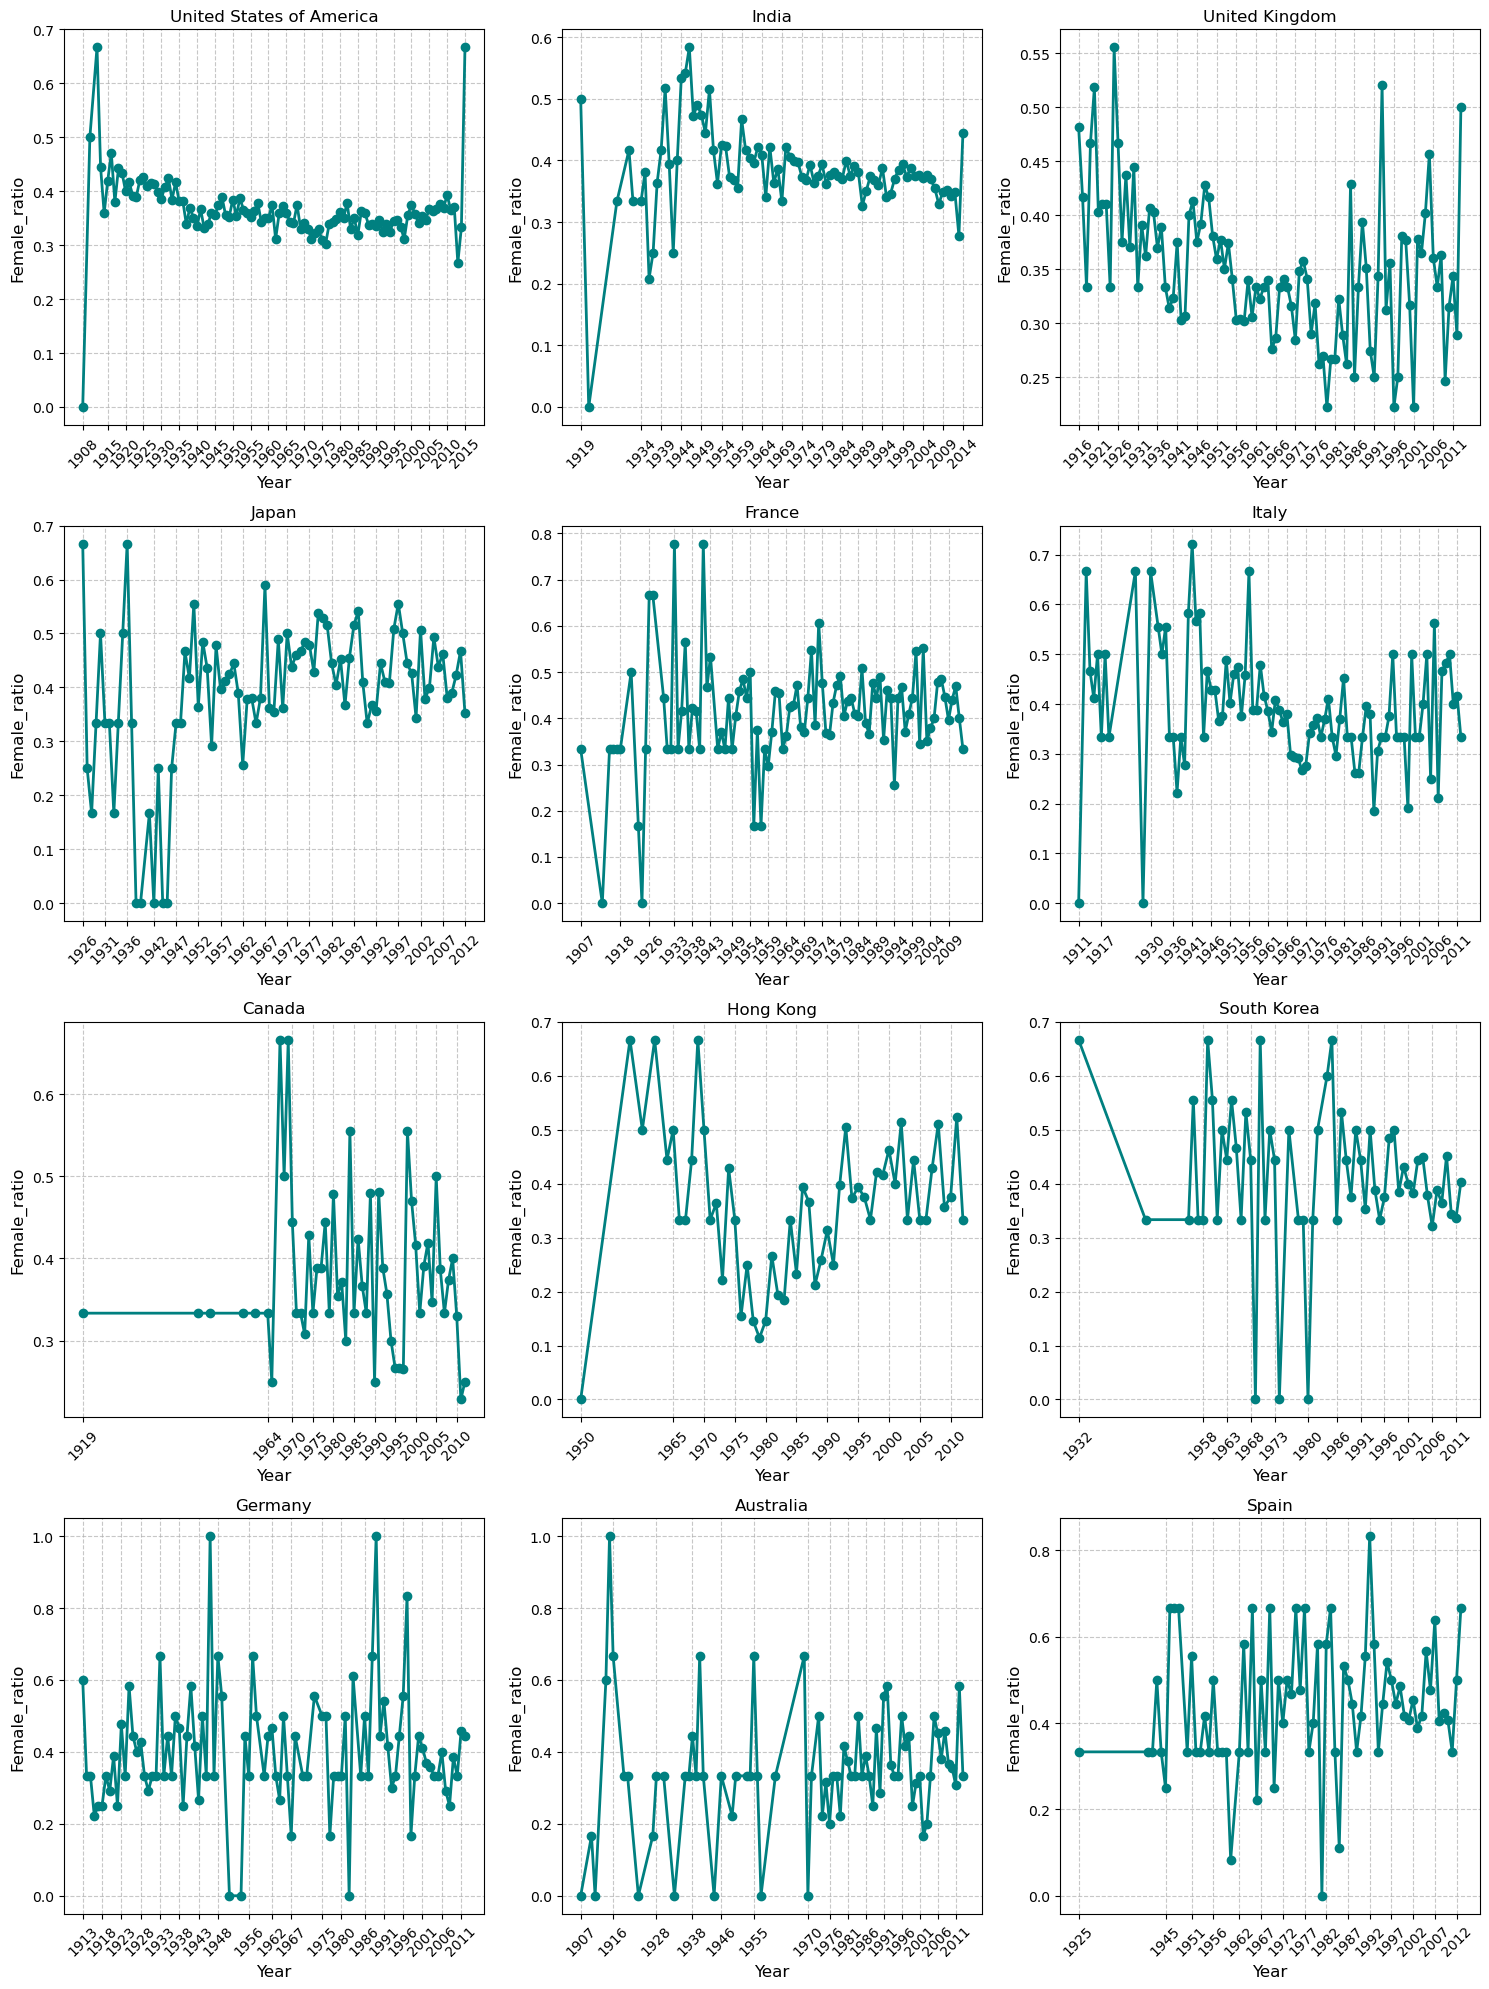

In [228]:
num_countries = 12
countries = list(sorted_by_values.keys())[:num_countries]
cols = 3  
rows = (num_countries // cols) + (num_countries % cols > 0)  

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  
for i, country in enumerate(countries):
    plt.sca(axes[i]) 
    country_female_ratio(copy_merged_df, country) 
    axes[i].set_title(country)  

plt.tight_layout()
plt.show()

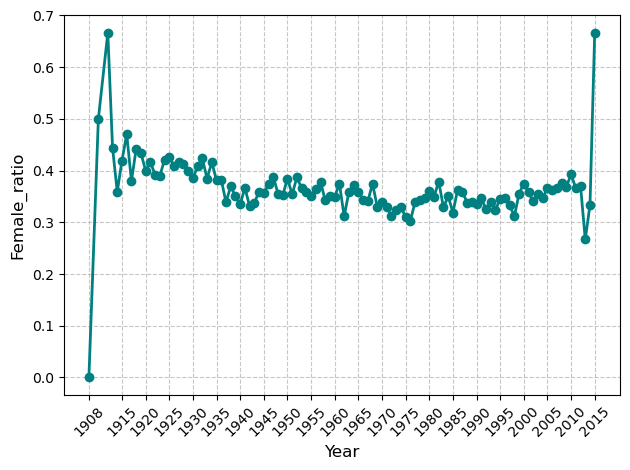

In [226]:
country_female_ratio(copy_merged_df, 'United States of America')

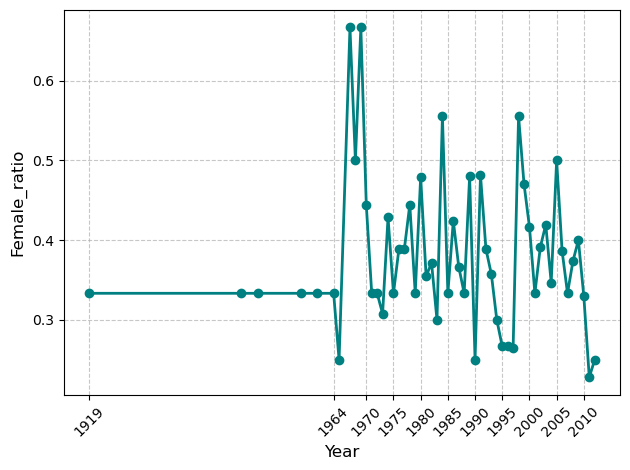

In [230]:
country_female_ratio(copy_merged_df, 'Canada')